# **Titanic Survival Prediction**

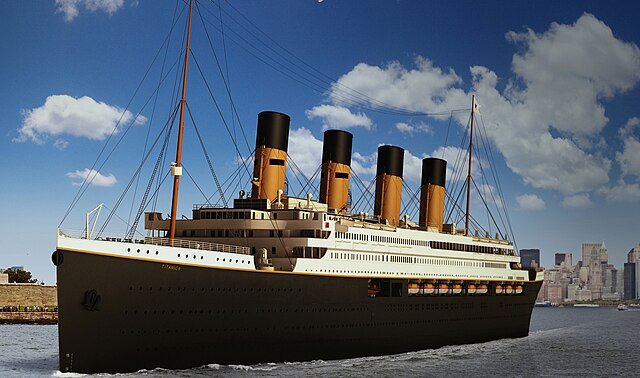

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**printing out first and last five columns**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Columns of Dataset**

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Data type of each columns**

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Shape of Dataset**

In [ ]:
df.shape

(418, 12)

**Data Visulization**

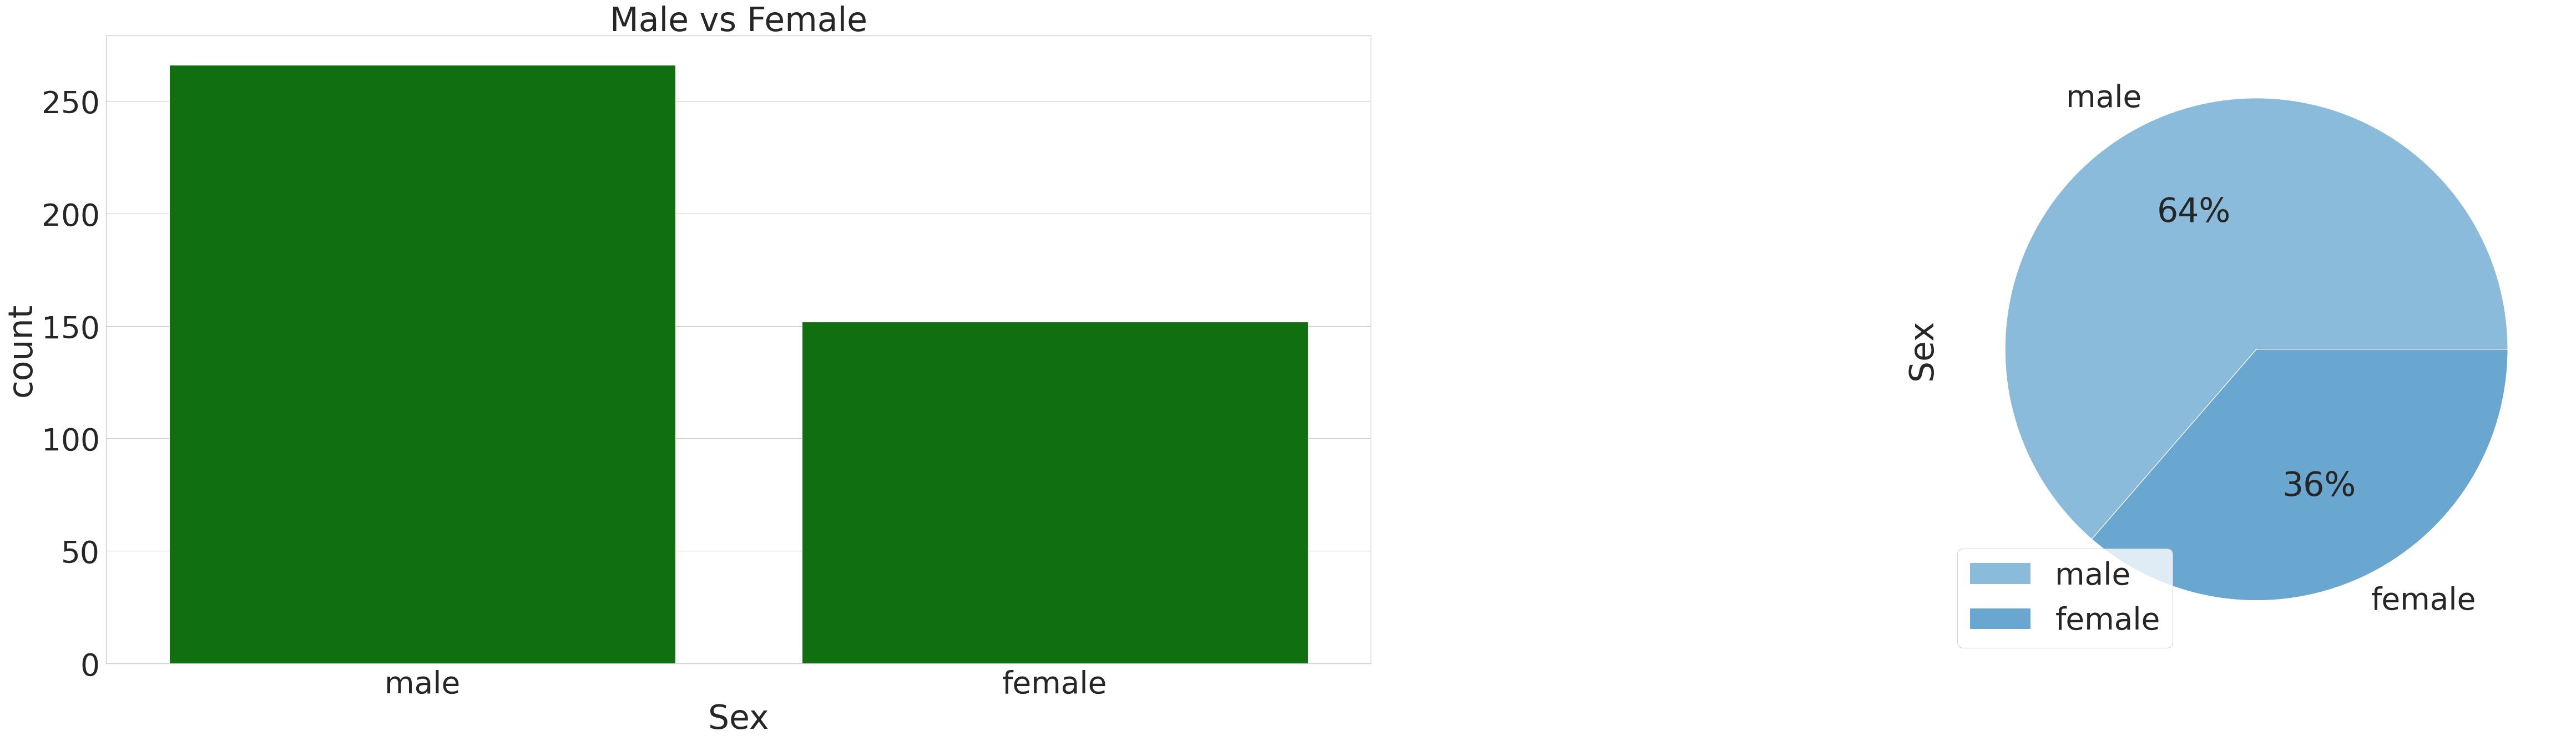

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(100,50))
sns.set_context('paper', font_scale=4.5)

plt.subplot(3,3,1)
sns.countplot(x='Sex', data = df,color='green').set_title('Male vs Female')

plt.subplot(3,3,2)
df["Sex"].value_counts().plot.pie(autopct='%1.0f%%',colors=sns.color_palette('Blues_d'))
plt.legend()

Percentage of Pclass = 1 who survived: 51.28205128205128
Percentage of Pclass = 2 who survived: 50.0
Percentage of Pclass = 3 who survived: 33.33333333333333


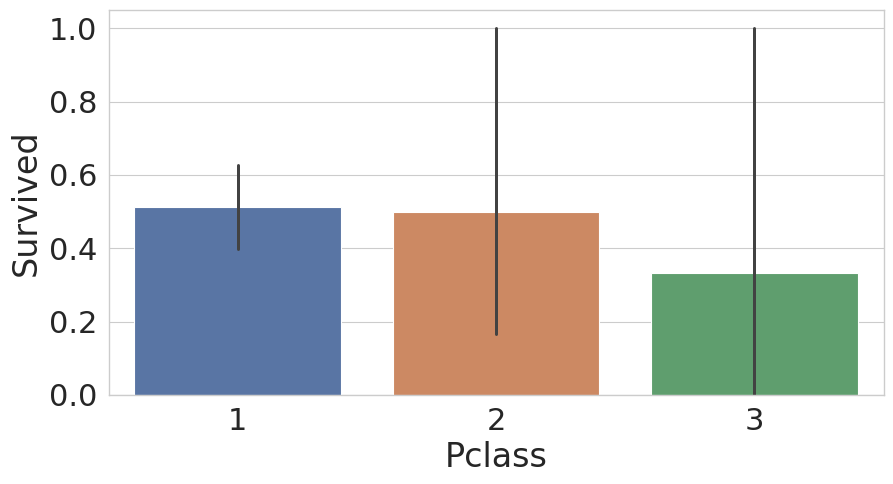

In [ ]:
#draw a bar plot of survival by Pclass
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.set_context('paper', font_scale=2.5)
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Text(0.5, 1.0, 'SibSp vs Survival')

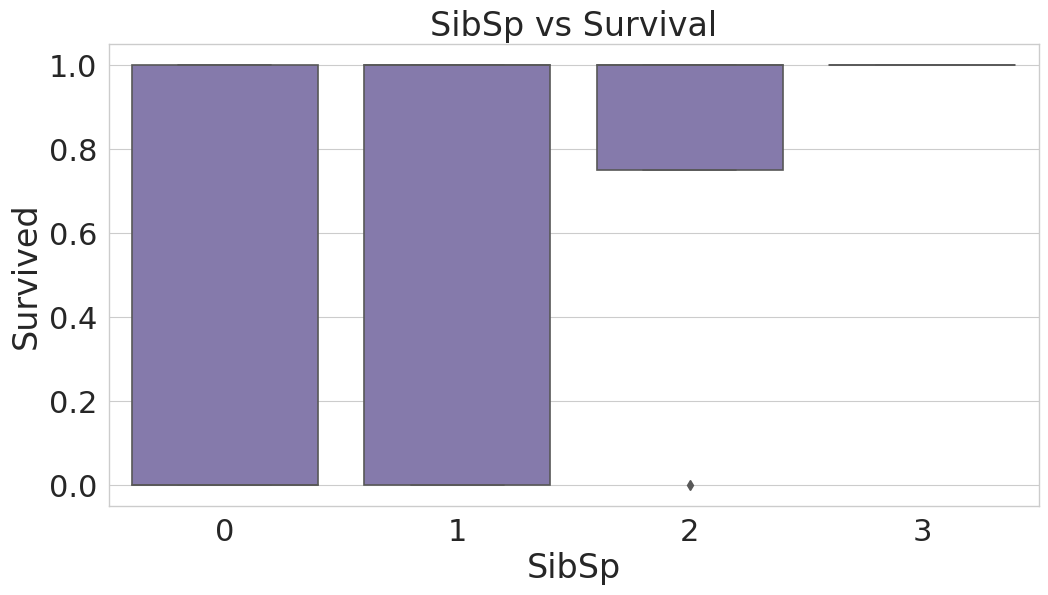

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=2.5)
sns.boxplot(x='SibSp',y='Survived', data = df,color='m').set_title('SibSp vs Survival')


Text(0.5, 1.0, 'Parch vs Survival')

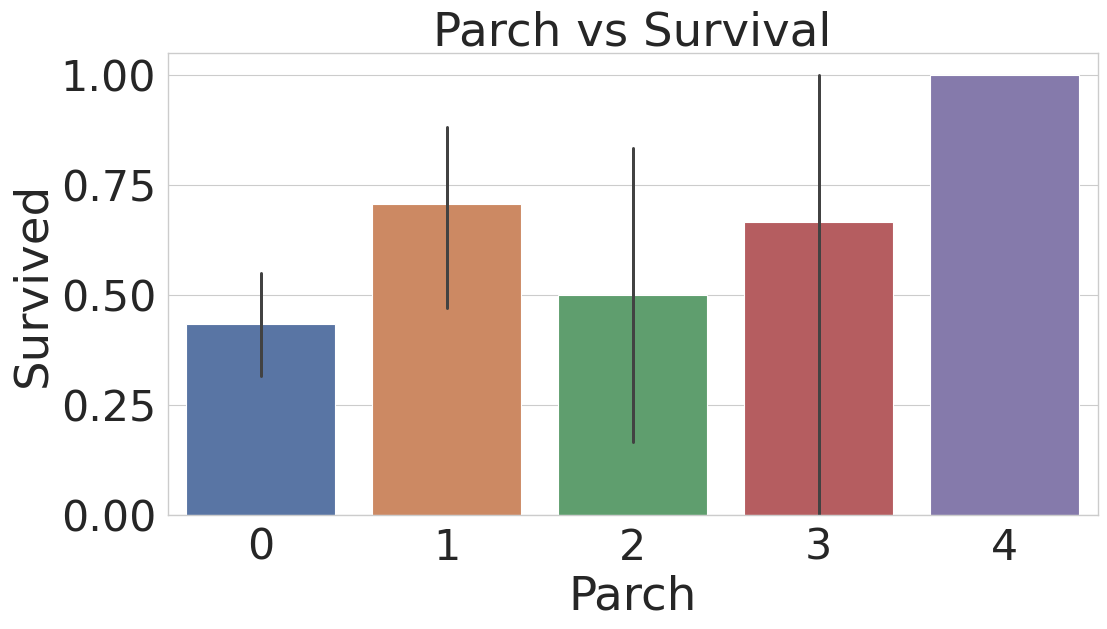

In [ ]:
#draw a bar plot for Parch vs. survival
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.set_context('paper', font_scale=3.5)
sns.barplot(x="Parch", y="Survived", data=df).set_title('Parch vs Survival')


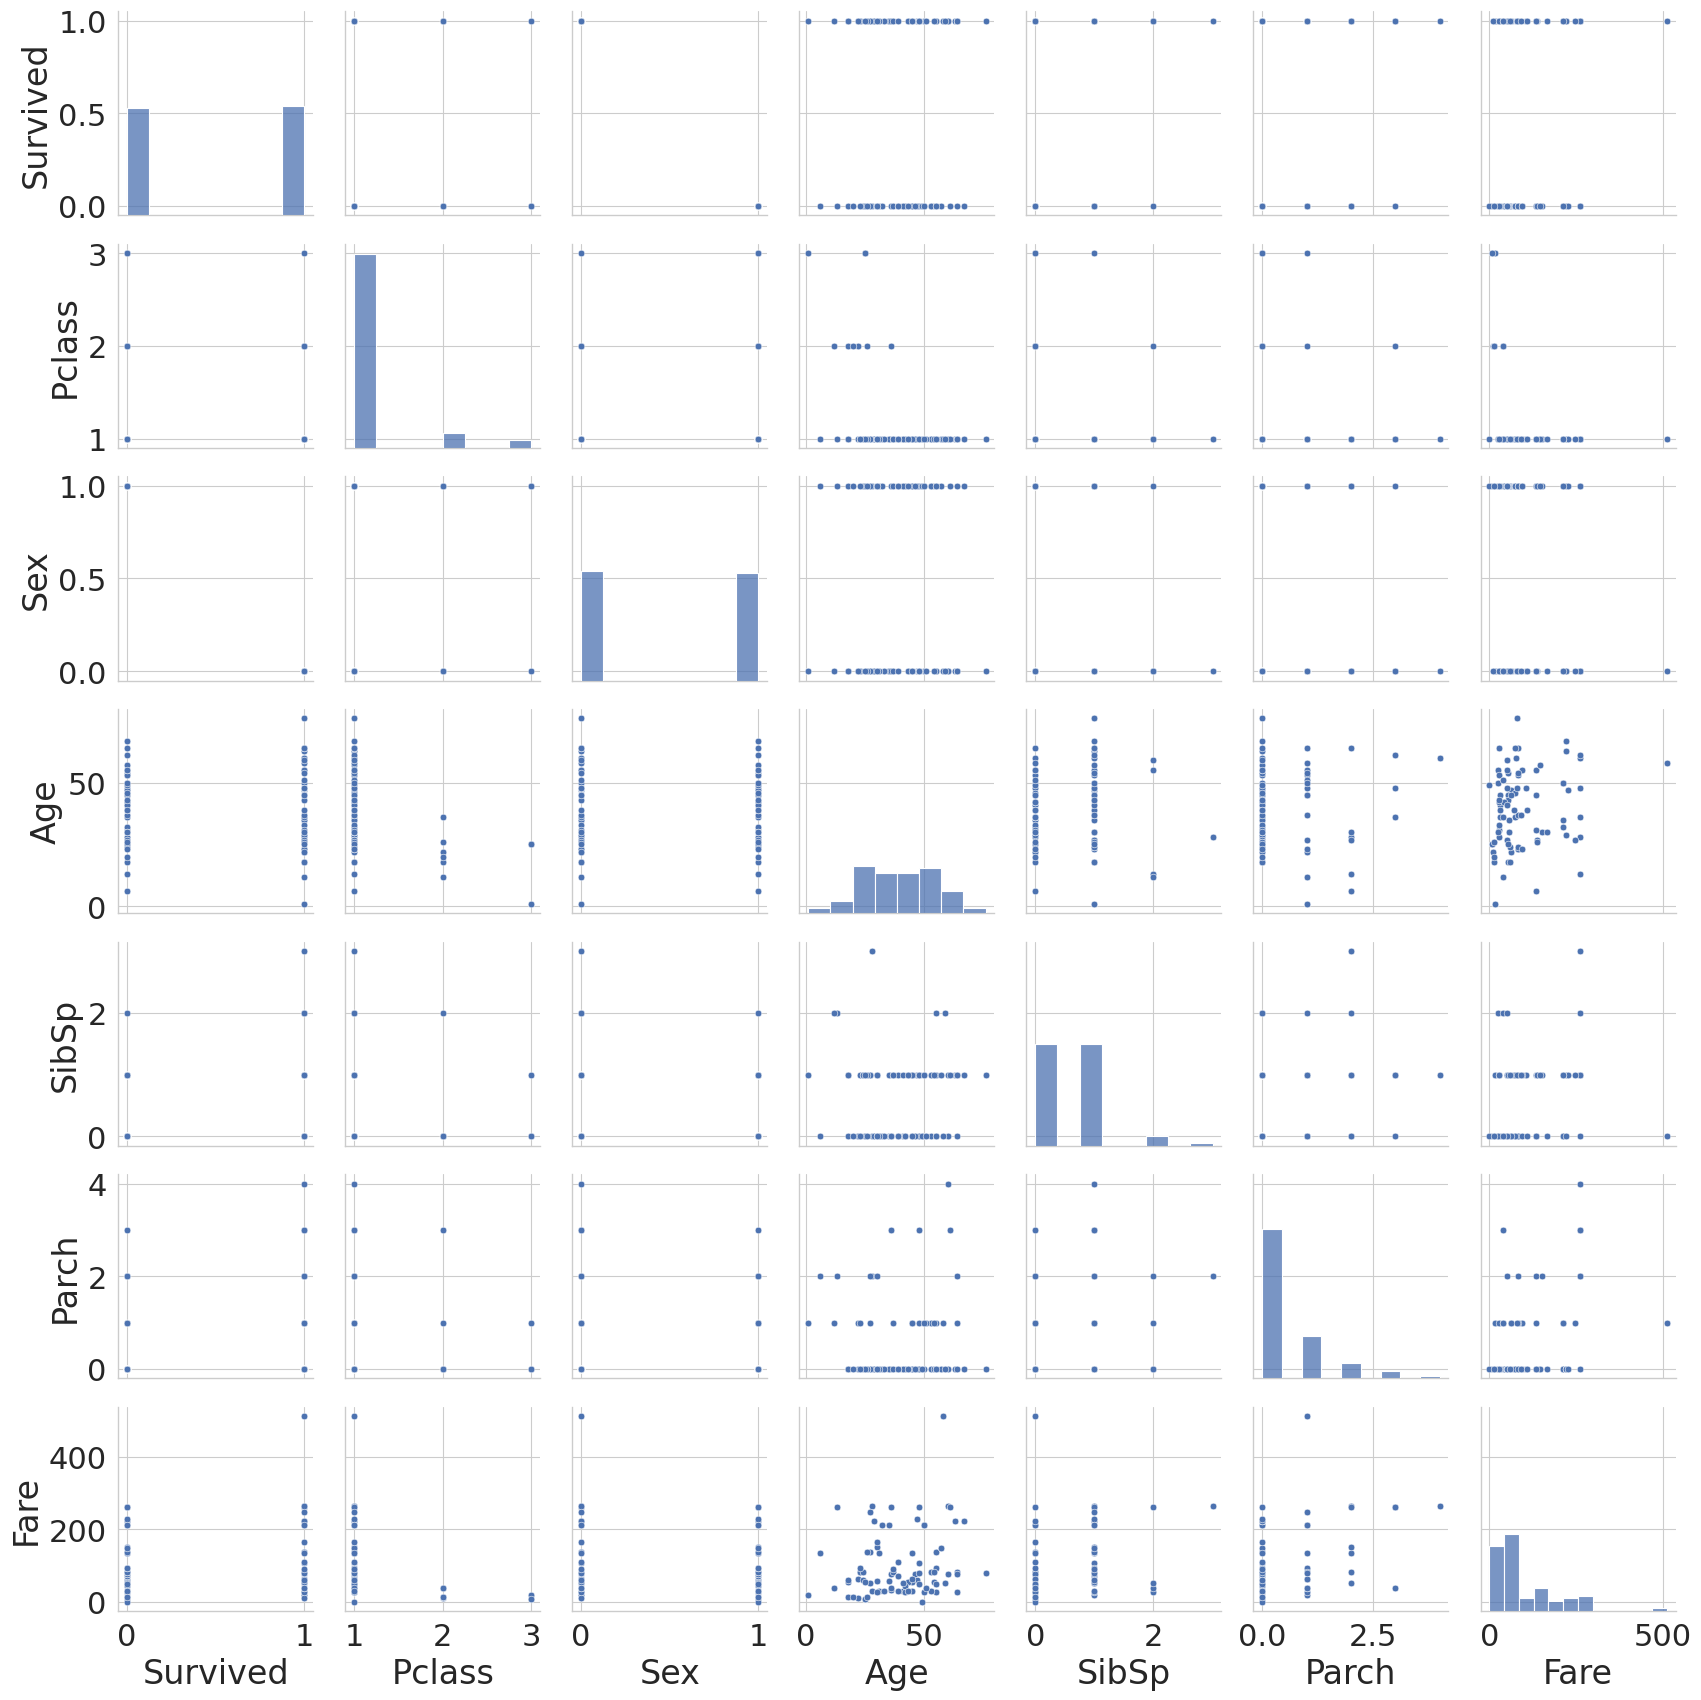

In [ ]:
sns.pairplot(data=df)

<Axes: >

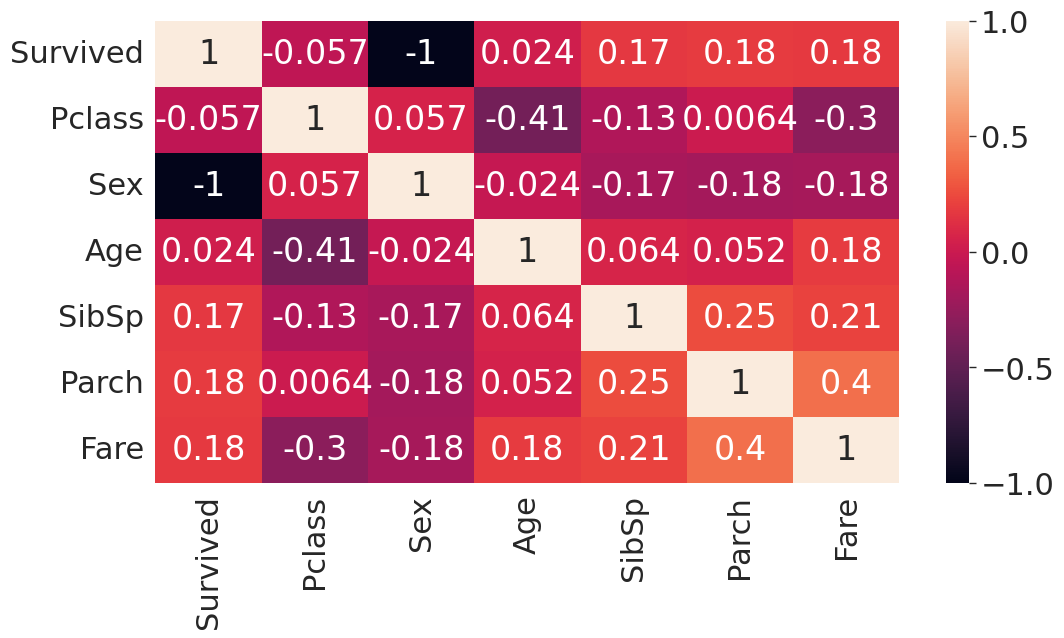

In [ ]:
correlation=df.corr()
plt.figure(figsize =(12,6))
sns.heatmap(df.corr(), annot=True)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Data Information and Data Cleaning
    </h3>
    </div>

In [ ]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

,Missing Values,Percentage
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,86,20.57%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,1,0.24%


In [ ]:
df = df.dropna()

**Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,S


In [ ]:
df['Age'] = df['Age'].round().astype(int)

In [ ]:
df['Fare'] = df['Fare'].round().astype(int)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23,1,0,21228,82,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47,1,0,W.E.P. 5734,61,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48,1,3,PC 17608,262,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22,0,1,113509,62,B36,C
28,920,0,1,"Brady, Mr. John Bertram",1,41,0,0,113054,30,A21,S


**Dropping unwanted columns**

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  87 non-null     int64
 1   Pclass    87 non-null     int64
 2   Sex       87 non-null     int64
 3   Age       87 non-null     int64
 4   SibSp     87 non-null     int64
 5   Parch     87 non-null     int64
 6   Fare      87 non-null     int64
dtypes: int64(7)
memory usage: 5.4 KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:BLACK;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:CYAN;
              text-align:center;'>
        Building Model
    </h3>
    </div>

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69, 6)
(69, 1)
(18, 6)
(18, 1)


In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=6))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                70        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
past = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
2/2 [==============================] - 1s 179ms/step - loss: 0.4974 - mean_absolute_error: 0.5975 - val_loss: 0.4233 - val_mean_absolute_error: 0.5481
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 0.4903 - mean_absolute_error: 0.5956 - val_loss: 0.4154 - val_mean_absolute_error: 0.5455
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 0.4838 - mean_absolute_error: 0.5940 - val_loss: 0.4077 - val_mean_absolute_error: 0.5430
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.4769 - mean_absolute_error: 0.5919 - val_loss: 0.4006 - val_mean_absolute_error: 0.5406
Epoch 5/50
2/2 [==============================] - 0s 34ms/step - loss: 0.4714 - mean_absolute_error: 0.5910 - val_loss: 0.3937 - val_mean_absolute_error: 0.5384
Epoch 6/50
2/2 [==============================] - 0s 31ms/step - loss: 0.4647 - mean_absolute_error: 0.5891 - val_loss: 0.3871 - val_mean_absolute_error: 0.5362
Epoch 7/50
2/2 [=================

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 59ms/step


In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score is:",R2 )

R2 Score is: 0.9293414393145344
